## 0b) Creating the file structure

In [1]:
import os

current_dir = os.path.abspath("")

print(f"{current_dir}")

current_dir_files = os.listdir(current_dir)
print(f"{current_dir_files}")

first_folder = ["experiment_small_data", "experiment_tiny_data"]
second_folder = ["train", "test", "val"]

for a in range(len(first_folder)):
        try:
            os.mkdir(f"{first_folder[a]}")
        except FileExistsError as err:
            print(err)
        for b in range(len(second_folder)):
            try:
                os.mkdir(f"{first_folder[a]}/{second_folder[b]}")
            except FileExistsError as err:
                print(err)

c:\Users\fredr\OneDrive\Documents\GitHub\Deep_Learning_FH\Labb1
['experiment_tiny_data', 'lab.ipynb', 'originaldata']
[WinError 183] Det går inte att skapa en fil som redan finns: 'experiment_tiny_data'
[WinError 183] Det går inte att skapa en fil som redan finns: 'experiment_tiny_data/train'
[WinError 183] Det går inte att skapa en fil som redan finns: 'experiment_tiny_data/test'
[WinError 183] Det går inte att skapa en fil som redan finns: 'experiment_tiny_data/val'


## 0b) Plotting 10 random cat images

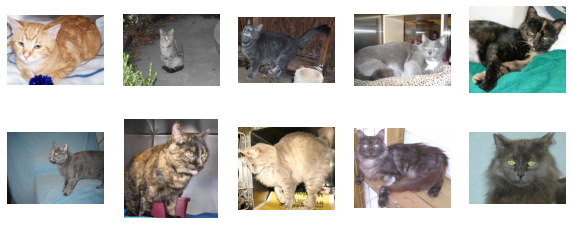

In [2]:
import matplotlib.pyplot as plt
import random as rnd

ten_rand_image = []
for i in range(10):
    r = rnd.randint(1,500)
    ten_rand_image.append(plt.imread(f"./originaldata/train/train/cat.{r}.jpg"))


fig, axes = plt.subplots(2,5, figsize = (10,4))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(ten_rand_image[i], cmap = "gray")
    ax.axis("off")


## 0d) Train / Val / Test / Split

In [3]:
import shutil

r = rnd.sample(range(12499), 1250) # This random-list is created without duplicates, so no duplicates of pictures.
train_path = r"./experiment_small_data/train"
test_path = r"./experiment_small_data/test"
val_path = r"./experiment_small_data/val"
for i in range(1250):
        train_cat = f"./originaldata/train/train/cat.{r[i]}.jpg"
        train_dog = f"./originaldata/train/train/dog.{r[i]}.jpg"
        if i <= 800:
                end_path = train_path
        elif i <= 1000:
                end_path = val_path
        else:
                end_path = test_path
        shutil.copy(train_cat, end_path)
        shutil.copy(train_dog, end_path)

## 0e) One-hot-encoding

In [4]:
import numpy as np
temporary_train = np.array(os.listdir("./experiment_small_data/train"))
temporary_test = np.array(os.listdir("./experiment_small_data/test"))
temporary_val = np.array(os.listdir("./experiment_small_data/val"))
X_train = []
y_train = []
X_train_val = []
y_train_val = []
X_test = []
y_test = []


rnd.shuffle(temporary_train)
rnd.shuffle(temporary_val)
for i,_ in enumerate(temporary_val):
    if temporary_val[i][0:3] == "dog":
        animal = 1
    elif temporary_val[i][0:3] == "cat":
        animal = 0
    X_train_val.append(plt.imread(f"./experiment_small_data/val/{temporary_val[i]}"))
    y_train_val.append(animal)

for i,_ in enumerate(temporary_train):
    if temporary_train[i][0:3] == "dog":
        animal = 1
    elif temporary_train[i][0:3] == "cat":
        animal = 0
    X_train.append(plt.imread(f"./experiment_small_data/train/{temporary_train[i]}"))
    y_train.append(animal)

for i,_ in enumerate(temporary_test):
    if temporary_train[i][0:3] == "dog":
        animal = 1
    elif temporary_train[i][0:3] == "cat":
        animal = 0
    X_test.append(plt.imread(f"./experiment_small_data/test/{temporary_test[i]}"))
    y_test.append(animal)


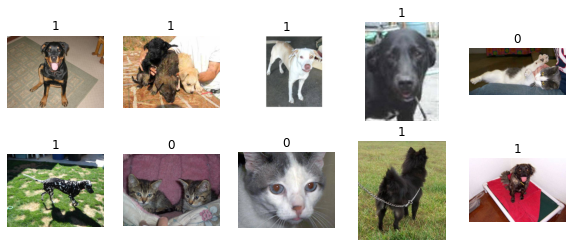

In [5]:
# plotting
fig, axes = plt.subplots(2,5, figsize = (10,4))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(X_train[i], cmap = "gray")
    ax.axis("off")
    ax.set(title=y_train[i])


([<matplotlib.patches.Wedge at 0x1e9cc745100>,
 [Text(6.735557395310444e-17, 1.1, ''),
  Text(-2.0206672185931328e-16, -1.1, '')])

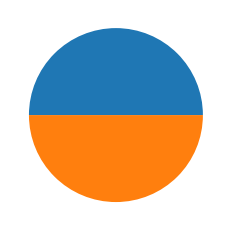

In [6]:
plt.pie([y_train.count(0),y_train.count(1)])

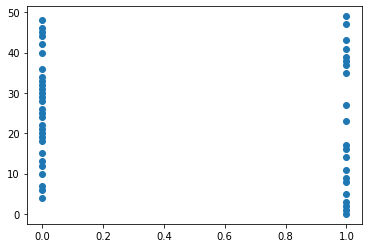

In [7]:
# plotting that they are not in a specific order, just random.
plot_list = []
x=0
for i in range(50):
    plot_list.append(x)
    x+=1
plt.scatter(x = y_train[0:50], y = plot_list)

## 1a) Plot image sizes.

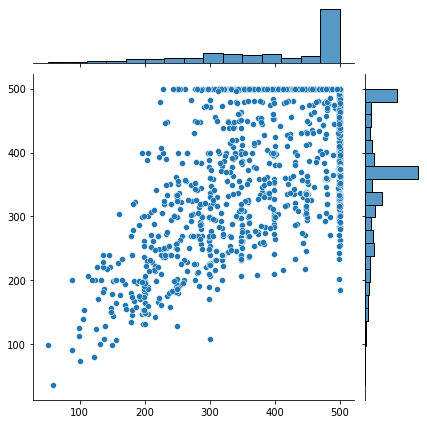

In [8]:
import seaborn as sns
import PIL

directory = './experiment_small_data/train/'
joint_x = []
joint_y = []

# code taken from https://www.geeksforgeeks.org/how-to-iterate-over-files-in-directory-using-python/
# but rewritten
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    if os.path.isfile(f):
        image = PIL.Image.open(f)
        width, height = image.size
        joint_x.append(width)
        joint_y.append(height)

sns.jointplot(x = joint_x, y = joint_y)

## 1b) Resized pictures

- I used 224,224 since this was one of the most commonly used sizes. Not to small to remove a lot of pixels but not too big to be too heavy for the model.

In [9]:
#resize = (224,224)
resize = (100,100)
# resizing the pictures into  a new list.
import cv2
resized_X_train = []
resized_X_val = []
resized_X_test = []
for i in range(len(X_train)):
    resized_X_train.append(cv2.resize(X_train[i], resize))
for i in range(len(X_train_val)):
    resized_X_val.append(cv2.resize(X_train_val[i], resize))
for i in range(len(X_test)):
    resized_X_test.append(cv2.resize(X_test[i], resize))

## 1c) Save the resized images into a new np array.

In [10]:
structured_resized_X_train = np.array(resized_X_train)
structured_resized_X_val = np.array(resized_X_val)
structured_resized_X_test = np.array(resized_X_test)

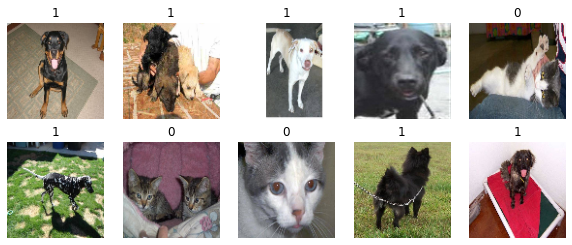

In [11]:
# plotting
fig, axes = plt.subplots(2,5, figsize = (10,4))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(structured_resized_X_train[i])
    ax.axis("off")
    ax.set(title=y_train[i])

## 1d) Data augmentation

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

structured_resized_X_train = structured_resized_X_train.astype("float32")/255
structured_resized_X_val = structured_resized_X_val.astype("float32")/255
structured_resized_X_test = structured_resized_X_test.astype("float32")/255
y_train = np.array(y_train)
y_train_val = np.array(y_train_val)
y_test = np.array(y_test)


train_image_generator = ImageDataGenerator(
    rotation_range = 15, 
    shear_range = .3,
    zoom_range = .2,
    horizontal_flip = False,
    height_shift_range = .2,
    width_shift_range = .2,
)

#don't augment validation and test data
test_image_generator = ImageDataGenerator()
train_X_generatior = test_image_generator.flow(structured_resized_X_test, y_test, batch_size=32)
train_X_generatior = test_image_generator.flow(structured_resized_X_train, y_train, batch_size=32)
train_val_generator = test_image_generator.flow(structured_resized_X_val, y_train_val, batch_size=32)
train_generator = train_image_generator.flow(
    structured_resized_X_train, y_train, batch_size = 800)


2
(32, 100, 100, 3)


array([0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0])

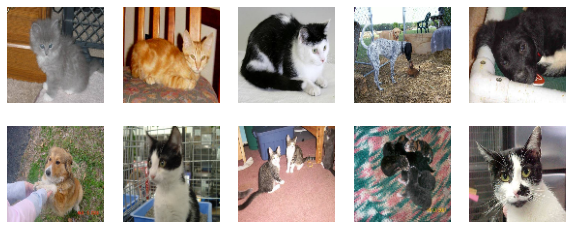

In [13]:
print(len(train_val_generator.next()))

sample_batch = train_val_generator.next()
print(sample_batch[0].shape) # 32 samples in a batch

def plot_samples(data):
    fig, axes = plt.subplots(2,5, figsize = (10,4))
    for i, ax in enumerate(axes.flatten()):
        ax.imshow(data[i], cmap = "gray")
        ax.axis("off")
        
plot_samples(sample_batch[0])
sample_batch[1]

(32, 100, 100, 3)
(1602, 100, 100, 3)
(400, 100, 100, 3)


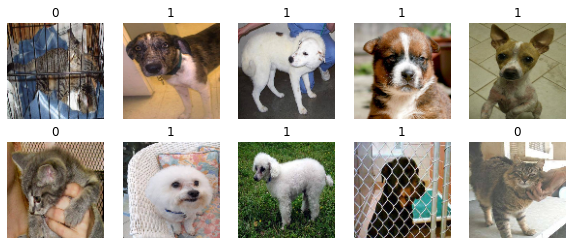

In [14]:
#test12 = structured_resized_X_train
#structured_resized_X_train.append(sample_batch[0])
print(sample_batch[0].shape)
print(structured_resized_X_train.shape)
print(structured_resized_X_val.shape)

# plotting
fig, axes = plt.subplots(2,5, figsize = (10,4))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(train_val_generator[0][0][i], cmap = "gray")
    ax.axis("off")
    ax.set(title=train_val_generator[0][1][i])

## 2a) Train models with hyperparameter tuning.

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.optimizers import Adam

def CNN_model(learning_rate = .001, drop_rate = .5, kernels = [32,64,128,128]):
    adam = Adam(learning_rate = learning_rate)

    model = Sequential(name = "CNN_model")

    for number_kernel in kernels:
        conv_layer = Conv2D(number_kernel, kernel_size = (3,3), 
            activation = "relu", kernel_initializer = "he_normal", 
            input_shape = structured_resized_X_train.shape[1:])
        
        model.add(conv_layer)
        model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))

    #MLP layers
    model.add(Flatten())
    model.add(Dropout(drop_rate))
    model.add(Dense(512, activation = "relu", kernel_initializer = "he_normal"))
    model.add(Dense(1, activation = "sigmoid"))

    model.compile(loss = "binary_crossentropy", optimizer = adam, metrics = ["acc"])

    return model

model = CNN_model()
model.summary()

Model: "CNN_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 10, 10, 128)      0 

In [16]:
steps_per_epochs = int(len(structured_resized_X_train)/32)
validation_steps = len(X_train_val)/32
validation_steps

12.5

In [17]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopper = EarlyStopping(monitor = "val_acc", mode ="max", patience = 5, restore_best_weights = True)

model.fit(
    train_X_generatior,
    steps_per_epoch = steps_per_epochs,
    epochs = 100,
    callbacks = [early_stopper],
    validation_data = train_val_generator,
    validation_steps=12
)

Epoch 1/100
50/50 [==============================] - 16s 295ms/step - loss: 0.8821 - acc: 0.5389 - val_loss: 0.6970 - val_acc: 0.5000
Epoch 2/100
50/50 [==============================] - 13s 266ms/step - loss: 0.6941 - acc: 0.5312 - val_loss: 0.6934 - val_acc: 0.4818
Epoch 3/100
50/50 [==============================] - 14s 276ms/step - loss: 0.6917 - acc: 0.5070 - val_loss: 0.6891 - val_acc: 0.5443
Epoch 4/100
50/50 [==============================] - 14s 286ms/step - loss: 0.6856 - acc: 0.5280 - val_loss: 0.6916 - val_acc: 0.5104
Epoch 5/100
50/50 [==============================] - 13s 269ms/step - loss: 0.6917 - acc: 0.5293 - val_loss: 0.6853 - val_acc: 0.5443
Epoch 6/100
50/50 [==============================] - 12s 230ms/step - loss: 0.6847 - acc: 0.5548 - val_loss: 0.6762 - val_acc: 0.5859
Epoch 7/100
50/50 [==============================] - 11s 212ms/step - loss: 0.6659 - acc: 0.6051 - val_loss: 0.6837 - val_acc: 0.5286
Epoch 8/100
50/50 [==============================] - 11s 221ms

In [18]:
from tensorflow.keras.callbacks import EarlyStopping

data_aug = test_image_generator.flow(
np.concatenate([structured_resized_X_val, structured_resized_X_train]),
np.concatenate([y_train_val, y_train]), batch_size=32)
model_augment = CNN_model()
model_augment.fit(
    train_X_generatior,
    steps_per_epoch = steps_per_epochs,
    epochs = 100,
    callbacks = [early_stopper],
    validation_data = train_val_generator,
    validation_steps=12
)

In [19]:
import pandas as panda
metrics = panda.DataFrame(model.history.history)
metrics.head()

,loss,acc,val_loss,val_acc
0,0.882081,0.538854,0.697031,0.500000
1,0.694126,0.531210,0.693419,0.481771
2,0.691731,0.507006,0.689144,0.544271
3,0.685603,0.528025,0.691601,0.510417
4,0.691746,0.529299,0.685285,0.544271


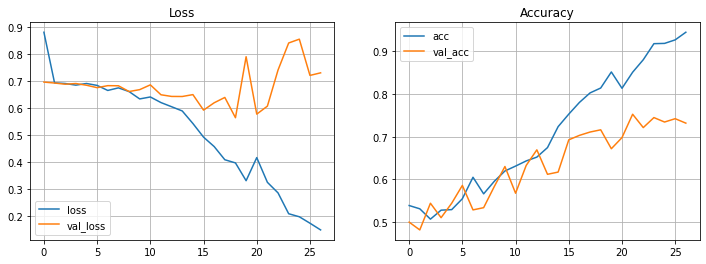

In [20]:
def plot_metrics(metrics):
    _, ax = plt.subplots(1,2, figsize = (12,4))
    metrics[["loss", "val_loss"]].plot(ax = ax[0], title = "Loss", grid = True)
    metrics[["acc", "val_acc"]].plot(ax = ax[1], title = "Accuracy", grid = True)

plot_metrics(metrics)

In [21]:
from tensorflow.keras.callbacks import EarlyStopping
learning_rate_param = [0.001,0.005]
drop_rates_param = [0.5, 0.001, 0.0001]
ln001 = []
ln005 = []

early_stopper = EarlyStopping(monitor = "val_acc", mode ="max", patience = 5, restore_best_weights = True)

for a in range(len(learning_rate_param)):
    for b in range(len(drop_rates_param)):
        print(f"Drop rate: {drop_rates_param[b]}, Learning rate: {learning_rate_param[a]}")
        model2 = CNN_model(learning_rate=learning_rate_param[a], drop_rate = drop_rates_param[b])
        model2.fit(
            train_X_generatior,
            steps_per_epoch = steps_per_epochs,
            epochs = 25,
            callbacks = [early_stopper],
            validation_data = train_val_generator,
            validation_steps=12
        )
        if a == 0:
            ln001.append(model2.history.history["val_acc"])
        elif a == 1:
            ln005.append(model2.history.history["val_acc"])
        


Drop rate: 0.5, Learning rate: 0.001
Epoch 1/25
50/50 [==============================] - 11s 201ms/step - loss: 0.8353 - acc: 0.5166 - val_loss: 0.6902 - val_acc: 0.5026
Epoch 2/25
50/50 [==============================] - 9s 187ms/step - loss: 0.6953 - acc: 0.5083 - val_loss: 0.6896 - val_acc: 0.4974
Epoch 3/25
50/50 [==============================] - 11s 215ms/step - loss: 0.6828 - acc: 0.5567 - val_loss: 0.7088 - val_acc: 0.4948
Epoch 4/25
50/50 [==============================] - 11s 216ms/step - loss: 0.6853 - acc: 0.5592 - val_loss: 0.6775 - val_acc: 0.5495
Epoch 5/25
50/50 [==============================] - 10s 196ms/step - loss: 0.6845 - acc: 0.5433 - val_loss: 0.6691 - val_acc: 0.6094
Epoch 6/25
50/50 [==============================] - 10s 191ms/step - loss: 0.6425 - acc: 0.6210 - val_loss: 0.7467 - val_acc: 0.5729
Epoch 7/25
50/50 [==============================] - 10s 196ms/step - loss: 0.6384 - acc: 0.6274 - val_loss: 0.6299 - val_acc: 0.6589
Epoch 8/25
50/50 [===============

In [22]:
ln001 = panda.DataFrame(ln001).transpose()
ln005 = panda.DataFrame(ln005).transpose()

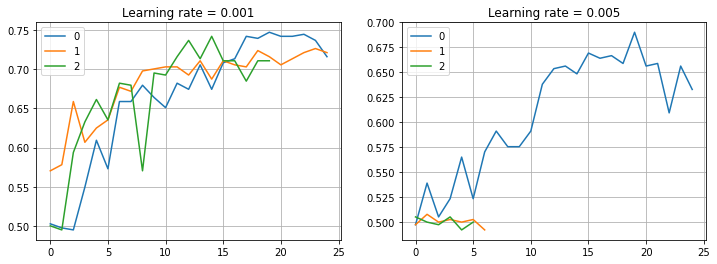

In [23]:
def plot_metrics():
    _, ax = plt.subplots(1,2, figsize = (12,4))
    ln001.plot(ax = ax[0], title = "Learning rate = 0.001", grid = True)
    ln005.plot(ax = ax[1], title = "Learning rate = 0.005", grid = True)

plot_metrics()

In [24]:
# Testing another model with only two layers, based on article reccomending to start with 1 or 2 layers only.
model3 = CNN_model(kernels=[256,128])
model3.fit(
            train_X_generatior,
            steps_per_epoch = steps_per_epochs,
            epochs = 25,
            callbacks = [early_stopper],
            validation_data = train_val_generator,
            validation_steps=12
        )

Epoch 1/25
50/50 [==============================] - 68s 1s/step - loss: 2.6029 - acc: 0.4981 - val_loss: 0.6931 - val_acc: 0.5026
Epoch 2/25
50/50 [==============================] - 65s 1s/step - loss: 0.6931 - acc: 0.5045 - val_loss: 0.6929 - val_acc: 0.4922
Epoch 3/25
50/50 [==============================] - 66s 1s/step - loss: 0.6960 - acc: 0.5191 - val_loss: 0.6932 - val_acc: 0.5000
Epoch 4/25
50/50 [==============================] - 64s 1s/step - loss: 0.6926 - acc: 0.5006 - val_loss: 0.6934 - val_acc: 0.5078
Epoch 5/25
50/50 [==============================] - 65s 1s/step - loss: 0.6901 - acc: 0.5166 - val_loss: 0.6946 - val_acc: 0.5026
Epoch 6/25
50/50 [==============================] - 2313s 47s/step - loss: 0.6832 - acc: 0.5363 - val_loss: 0.6897 - val_acc: 0.5234
Epoch 7/25
50/50 [==============================] - 72s 1s/step - loss: 0.6701 - acc: 0.5618 - val_loss: 0.6955 - val_acc: 0.5182
Epoch 8/25
50/50 [==============================] - 65s 1s/step - loss: 0.6578 - acc: 0

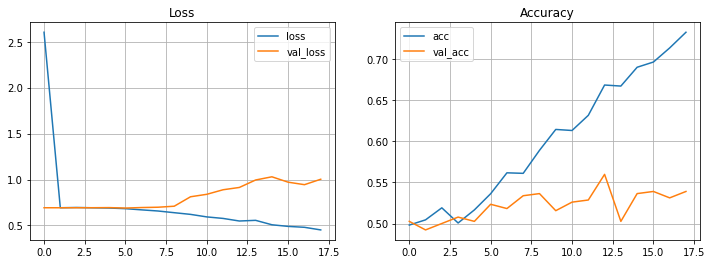

In [25]:
metrics = panda.DataFrame(model3.history.history)
def plot_metrics(metrics):
    _, ax = plt.subplots(1,2, figsize = (12,4))
    metrics[["loss", "val_loss"]].plot(ax = ax[0], title = "Loss", grid = True)
    metrics[["acc", "val_acc"]].plot(ax = ax[1], title = "Accuracy", grid = True)

plot_metrics(metrics)

In [26]:
model4 = CNN_model(kernels=[64,32,16,16], learning_rate= 0.001, drop_rate= 0.7)
early_stopper = EarlyStopping(monitor = "val_acc", mode ="max", patience = 10, restore_best_weights = True)
model4.fit(
            train_X_generatior,
            steps_per_epoch = steps_per_epochs,
            epochs = 50,
            callbacks = [early_stopper],
            validation_data = train_val_generator,
            validation_steps=12
        )

Epoch 1/50
50/50 [==============================] - 12s 224ms/step - loss: 0.7304 - acc: 0.5070 - val_loss: 0.6909 - val_acc: 0.5156
Epoch 2/50
50/50 [==============================] - 11s 218ms/step - loss: 0.6925 - acc: 0.5242 - val_loss: 0.6938 - val_acc: 0.4948
Epoch 3/50
50/50 [==============================] - 11s 217ms/step - loss: 0.6958 - acc: 0.5102 - val_loss: 0.6848 - val_acc: 0.5651
Epoch 4/50
50/50 [==============================] - 11s 229ms/step - loss: 0.6933 - acc: 0.5032 - val_loss: 0.6918 - val_acc: 0.5365
Epoch 5/50
50/50 [==============================] - 11s 221ms/step - loss: 0.6862 - acc: 0.5427 - val_loss: 0.6853 - val_acc: 0.5286
Epoch 6/50
50/50 [==============================] - 11s 223ms/step - loss: 0.6883 - acc: 0.5529 - val_loss: 0.6909 - val_acc: 0.5130
Epoch 7/50
50/50 [==============================] - 11s 228ms/step - loss: 0.6856 - acc: 0.5471 - val_loss: 0.6816 - val_acc: 0.5495
Epoch 8/50
50/50 [==============================] - 11s 222ms/step - 

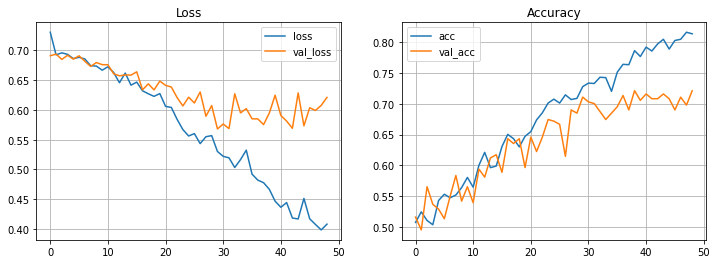

In [27]:
metrics = panda.DataFrame(model4.history.history)
plot_metrics(metrics)

## Choosing a model and train it on train and val data

In [28]:
ChoosenModel = CNN_model(learning_rate= 0.001, drop_rate= 0.7)

valandtrain_generation = test_image_generator.flow(
np.concatenate([structured_resized_X_val, structured_resized_X_train]),
np.concatenate([y_train_val, y_train]), batch_size=32)

early_stopper = EarlyStopping(monitor = "val_acc", mode ="max", patience = 10, restore_best_weights = True)
ChoosenModel.fit(
            train_X_generatior,
            steps_per_epoch = steps_per_epochs,
            epochs = 50,
            callbacks = [early_stopper],
            validation_data = train_val_generator,
            validation_steps=12
        )

Epoch 1/50
50/50 [==============================] - 11s 211ms/step - loss: 0.7849 - acc: 0.4834 - val_loss: 0.6908 - val_acc: 0.5625
Epoch 2/50
50/50 [==============================] - 12s 232ms/step - loss: 0.6922 - acc: 0.5312 - val_loss: 0.6863 - val_acc: 0.5547
Epoch 3/50
50/50 [==============================] - 12s 230ms/step - loss: 0.6908 - acc: 0.5255 - val_loss: 0.6845 - val_acc: 0.5703
Epoch 4/50
50/50 [==============================] - 11s 221ms/step - loss: 0.6801 - acc: 0.5592 - val_loss: 0.6780 - val_acc: 0.6068
Epoch 5/50
50/50 [==============================] - 11s 211ms/step - loss: 0.6791 - acc: 0.5771 - val_loss: 0.6662 - val_acc: 0.5990
Epoch 6/50
50/50 [==============================] - 10s 206ms/step - loss: 0.6767 - acc: 0.5815 - val_loss: 0.6845 - val_acc: 0.6328
Epoch 7/50
50/50 [==============================] - 10s 192ms/step - loss: 0.6577 - acc: 0.6006 - val_loss: 0.6546 - val_acc: 0.6276
Epoch 8/50
50/50 [==============================] - 10s 207ms/step - 

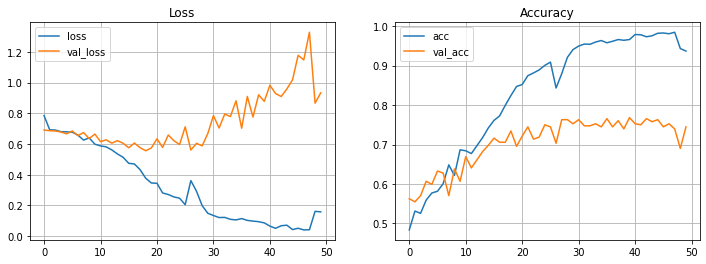

In [29]:
metrics = panda.DataFrame(ChoosenModel.history.history)
plot_metrics(metrics)

## Transfer Learning - Xception

In [30]:
from tensorflow.keras.applications import Xception
input_shape = 120, 120, 3
feature_extractor = Xception(weights = "imagenet", include_top = False, input_shape = (input_shape))
feature_extractor.summary()

Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 120, 120, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 59, 59, 32)   864         ['input_1[0][0]']                
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 59, 59, 32)  128         ['block1_conv1[0][0]']           
 ation)                                                                                           
                                                                                           

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D

model = Sequential(
    [
        feature_extractor,
        GlobalAveragePooling2D(),
        Dropout(0.5),
        Dense(256, activation="relu", kernel_initializer="he_normal"),
        Dropout(0.5),
        Dense(5, activation="sigmoid"),
    ]
)

for layer in feature_extractor.layers:
    layer.trainable = False
    
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["acc"])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 4, 4, 2048)        20861480  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout_10 (Dropout)        (None, 2048)              0         
                                                                 
 dense_20 (Dense)            (None, 256)               524544    
                                                                 
 dropout_11 (Dropout)        (None, 256)               0         
                                                                 
 dense_21 (Dense)            (None, 5)                 1285      
                                                        

In [32]:
model.fit(train_X_generatior, epochs = 20, validation_data = train_val_generator)

Epoch 1/20
51/51 [==============================] - 24s 425ms/step - loss: 0.5568 - acc: 0.8034 - val_loss: 0.2394 - val_acc: 0.8875
Epoch 2/20
51/51 [==============================] - 21s 408ms/step - loss: 0.3223 - acc: 0.8720 - val_loss: 0.2105 - val_acc: 0.9075
Epoch 3/20
51/51 [==============================] - 20s 387ms/step - loss: 0.2556 - acc: 0.8958 - val_loss: 0.2209 - val_acc: 0.8975
Epoch 4/20
51/51 [==============================] - 20s 389ms/step - loss: 0.2233 - acc: 0.9120 - val_loss: 0.2107 - val_acc: 0.9025
Epoch 5/20
51/51 [==============================] - 19s 379ms/step - loss: 0.2118 - acc: 0.9120 - val_loss: 0.2577 - val_acc: 0.8650
Epoch 6/20
51/51 [==============================] - 19s 380ms/step - loss: 0.1846 - acc: 0.9189 - val_loss: 0.2167 - val_acc: 0.8975
Epoch 7/20
51/51 [==============================] - 19s 380ms/step - loss: 0.1872 - acc: 0.9207 - val_loss: 0.2410 - val_acc: 0.8925
Epoch 8/20
51/51 [==============================] - 20s 403ms/step - 

<AxesSubplot:>

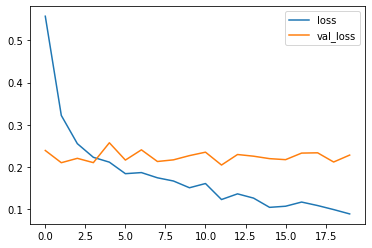

In [33]:
metrics = panda.DataFrame(model.history.history)
metrics[["loss", "val_loss"]].plot()

<AxesSubplot:>

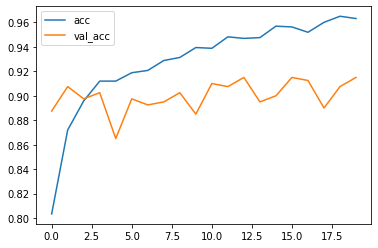

In [34]:
metrics[["acc", "val_acc"]].plot()

## Summary Xception & Transfer Learning

#### Xception article summary

Xception is a Convolutional Neural Network that is based on the Convolutional Neural Network "Inception". The founders behind Xception saw possible improvements of the Inception model if they changed the structure of the layers and architecture of the model, so they decideded to try it. They tested it on both the classification ImageNet dataset, that we used in our exercise above and also on the JFT dataset. The outcome was the they had small gain in accuraccy on the ImageNet dataset and large gains on JFT dataset. The outcome was sucessful and the author of the test/article means that hereafter, more people should start using the Xception model instead since it's easy to implement and use, and in some cases have better performance than the Inception model.


#### Description Transfer Learning

Transfer learning in machine learning is when you use an existing model or train a general model and then use it as the starting point for your new machine learning model. For example in our case we use a general deep learning model that is train on millions of pictures of different things and have already find a lot of pattern for classifing images. Then we use this model as the starting point of our own model that will classify cats and dogs. By doing this we shorten the training time a lot but also, we don't need the same amount of pictures to get a great model. Just by looking at the accuracy when using Xception first and then start our training compared to starting our training from scratch, we can see how efficiency the transfer learning is.